# Telecom Churn Case Study

## Step 1 : Reading and Understanding Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

In [2]:
# changing the default number of rows and columns to be displayed
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
# Reading dataset
df_orig = pd.read_csv('telecom_churn_data.csv')

In [4]:
# Printing shape of dataframe
df_orig.shape

(99999, 226)

In [5]:
# Printing top 5 rows
df_orig.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Printing bottom 5 rows
df_orig.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [7]:
# checking for missing values
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# Statistical Analysis of columns
df_orig.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

**Observations:**

mobile_number is the customer identifier

In [9]:
# Checking column wise percentage of missing values 
columnwise_missing = round((df_orig.isnull().sum() / df_orig.shape[0]) * 100, 2)
columnwise_missing[columnwise_missing>0.0]

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

In [10]:
# getting columns with missing data of more than 70%
above_70percent_missing_data_col = df_orig.columns[columnwise_missing >= 70]
above_70percent_missing_data_col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

## Step 2 : Data Cleaning and EDA

In [11]:
df = df_orig.copy()

### Drop columns with no variance

In [12]:
# dropping columns with no variance
no_var_cols = df.columns[df.eq(df.iloc[0]).all()].tolist()
no_var_cols

['circle_id', 'last_date_of_month_6']

In [13]:
# from the above observation, we can remove circle_id since it has the same value of "109" in all rows
df = df.drop(no_var_cols, axis=1)
df.shape

(99999, 224)

### Check for entire Null rows

In [14]:
df[df.isnull().all(1)]

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


### Creating target column - churn and  dropping related columns

In [15]:
# Lets Derive churn variable
# Considering 9th month as our churn
# getting all the columns with _9 appended to the end of column name
columns_9th_month = df.filter(regex='_9').columns
columns_9th_month
print(len(columns_9th_month))

54


In [16]:
# observing columns with _9 in suffix
df[columns_9th_month]

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,6,0,0,9/28/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
1,9/30/2014,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,72.11,116.09,56.93,0.00,173.03,0.00,15.01,0.00,0.0,15.01,188.04,0.00,0.00,0.00,5,121,50,9/30/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,9/30/2014,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,0.0,18.04,0.0,42.08,0.0,124.94,148.23,38.98,158.19,345.41,49.44,118.18,3.86,0.0,171.49,517.74,0.45,0.01,0.36,7,358,100,9/29/2014,0,9/17/2014,1.0,46.0,1.0,0.0,46.0,0.00,8.42,2.84,0.00,0.0,0,1,0,0,1.0
3,9/30/2014,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,0.0,236.21,0.0,43.29,0.0,362.54,41.73,52.86,65.59,160.19,129.84,13.98,0.00,0.0,143.83,305.38,0.55,0.00,0.80,14,410,50,9/30/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,9/30/2014,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.0,0.00,0.0,5.98,0.0,104.59,154.56,48.24,0.00,202.81,2.31,0.00,0.00,0.0,2.31,205.31,0.18,0.00,0.00,4,200,50,9/28/2014,50,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,9/30/2014,29.950,0.00,27.14,0.00,0.00,0.00,24.78,2.25,0.11,27.03,0.00,0.00,0.0,0.0,0.00,0.0,0.11,0.0,27.14,22.06,82.89,49.46,154.43,0.00,0.00,0.00,0.0,0.00,154.43,0.00,0.00,0.00,2,50,50,9/25/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
99995,9/30/2014,140.835,49.49,56.13,0.95,4.23,49.49,46.71,3.28,0.00,99.49,0.00,1.90,0.0,0.0,1.90,0.0,5.01,0.0,106.41,25.71,63.44,18.44,107.61,0.00,1.23,0.00,0.0,1.23,108.84,0.00,0.00,0.00,1,30,30,9/26/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
99996,9/30/2014,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1,0,0,9/2/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
99997,9/30/2014,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,2.21,0.00,2.21,0.00,0.00,0.00,0.0,0.00,2.21,0.00,0.00,0.00,6,862,252,9/17/2014,179,9/17/2014,4.0,252.0,0.0,4.0,862.0,85.67,4177.14,725.69,725.68,0.0,0,0,4,0,1.0


**Observations:**

From the above observaions:
1. total_og_mou_9 and total_ic_mou_9 gives us the total Minutes of usage - voice calls for incoming and  outgoing data.
2. vol_2g_mb_9 and vol_3g_mb_9 gives us the Mobile internet usage volume (in MB) for 2G and 3G network 



In [17]:
# Check for NULLs in target column variables
df[['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().sum()

total_og_mou_9    0
total_ic_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [18]:
# Creating churn variable
# If total_og_mou_9, total_ic_mou_9, vol_2g_mb_9 and vol_3g_mb_9 all have values 0, then customer is churned
# churn = 1 indicated customer has churned
churned_condition = ((df.total_og_mou_9 == 0) 
                     & (df.total_ic_mou_9 == 0) 
                     & (df.vol_2g_mb_9 == 0) 
                     & (df.vol_3g_mb_9 == 0))

In [19]:
# Creating churn variable
df['churn'] = churned_condition.astype(int)

In [20]:
#  checking total count of churn and non-churn in dataset
df.churn.value_counts()

0    89808
1    10191
Name: churn, dtype: int64

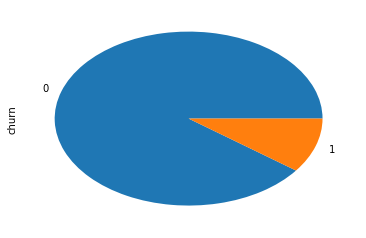

In [21]:
# Plotting pie chart to understand distribution of churn in dataset
df.churn.value_counts().plot(kind = 'pie')

In [22]:
# deleting columns that belong to churn month (belonging to 9th month or September month)
df = df.drop(columns_9th_month, axis=1)

In [23]:
# Removed 55 columns related to month 9
# Checking shape of dataset
df.shape

(99999, 171)

### Checking columns with more than 70% missing data and removing or imputing missing values/columns

In [24]:
# getting columns with missing data of more than 70%
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
above_70percent_missing_data_col = df.columns[columnwise_missing >= 70]
print(above_70percent_missing_data_col)
print("Number of columns with more than 70% missing values : ")
print(above_70percent_missing_data_col.shape[0])

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')
Number of columns with more than 70% missing values : 
30


In [25]:
# above, we see there are many columns related to recharge which has na values
# This may be because no recharges were done 
# lets observe only the above columns
df[above_70percent_missing_data_col].head(10)

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,1.0,1.0,1.0
1,NaN,7/25/2014,8/10/2014,NaN,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,NaN,1.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,NaN,NaN,1.0,NaN,NaN,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,56.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7/31/2014,8/23/2014,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,NaN,0.00,19.83,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1.0,1.0
9,NaN,7/23/2014,NaN,NaN,1.0,NaN,NaN,154.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,154.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,1.0,NaN


In [26]:
# we can remove the date columns since we have other columns which can compensate for the removed date columns
columns_date = df.filter(regex='date').columns
print(columns_date)
print(columns_date.shape[0])

# dropping the 8 date columns
df = df.drop(columns_date, axis=1)

Index(['last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
8


In [27]:
# checking shape of dataframe after dropping date columns
df.shape

(99999, 163)

In [28]:
# getting columns with missing data of more than 70%
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
above_70percent_missing_data_col = df.columns[columnwise_missing >= 70]
print(above_70percent_missing_data_col)
print("Number of columns with more than 70% missing values : ")
print(above_70percent_missing_data_col.shape[0])

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')
Number of columns with more than 70% missing values : 
27


In [29]:
# filtering only recharge columns to understand different recharge related columns in dataset
columns_rech = df.filter(regex='rech').columns
print(columns_rech)
print(columns_rech.shape[0])

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')
24


In [30]:
# total_rech_data_6 has more than 70% of missing values
# creating a separate list of columns for 6th month more than 70% missing value columns
above_70percent_6th_mon_missing_data_col = ['total_rech_data_6', 'max_rech_data_6',
                                'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 
                                'arpu_3g_6', 'arpu_2g_6']

# checking if all columns related to recharge for missing value total_rech_data_6 rows also have missing values
print(df[above_70percent_6th_mon_missing_data_col].isna().sum())
df[above_70percent_6th_mon_missing_data_col]

total_rech_data_6     74846
max_rech_data_6       74846
count_rech_2g_6       74846
count_rech_3g_6       74846
av_rech_amt_data_6    74846
arpu_3g_6             74846
arpu_2g_6             74846
dtype: int64


,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6
0,1.0,252.0,0.0,1.0,252.0,212.17,212.17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,56.0,1.0,0.0,56.0,0.00,0.00
...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,25.0,2.0,0.0,39.0,141.48,2.40
99997,3.0,202.0,1.0,2.0,583.0,235.68,235.68


**Obseravtions:**

1. We observe that all columns related to data recharge, night pack and average revenue per user for 2g/3g data have the same number of missing values. 
2. Also after observing first 5 and last 5  rows, we see that all these columns have the same rows of missing values. 

In [31]:
# From our above observations, replacing NaN values in recharge columns of 6th month with 0
# Replacing with 0, since NaN does not neccesarily mean missing values. It implies no recharge.
df[above_70percent_6th_mon_missing_data_col] = df[above_70percent_6th_mon_missing_data_col].fillna(0.0)

# checking if missing values have been replaced with 0
print(df[above_70percent_6th_mon_missing_data_col].isna().sum())
df[above_70percent_6th_mon_missing_data_col]

total_rech_data_6     0
max_rech_data_6       0
count_rech_2g_6       0
count_rech_3g_6       0
av_rech_amt_data_6    0
arpu_3g_6             0
arpu_2g_6             0
dtype: int64


,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6
0,1.0,252.0,0.0,1.0,252.0,212.17,212.17
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00
4,1.0,56.0,1.0,0.0,56.0,0.00,0.00
...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,0.0,0.00,0.00
99995,0.0,0.0,0.0,0.0,0.0,0.00,0.00
99996,2.0,25.0,2.0,0.0,39.0,141.48,2.40
99997,3.0,202.0,1.0,2.0,583.0,235.68,235.68


In [32]:
# total_rech_data_7 has more than 70% of missing values
# creating a separate list of columns for 7th month more than 70% missing value columns
above_70percent_7th_mon_missing_data_col = ['total_rech_data_7', 'max_rech_data_7',
                                'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 
                                'arpu_3g_7', 'arpu_2g_7']

# checking if all columns related to recharge for missing value total_rech_data_7 rows also have missing values
df[above_70percent_7th_mon_missing_data_col].isna().sum()

total_rech_data_7     74428
max_rech_data_7       74428
count_rech_2g_7       74428
count_rech_3g_7       74428
av_rech_amt_data_7    74428
arpu_3g_7             74428
arpu_2g_7             74428
dtype: int64

In [33]:
# From our above observations, replacing NaN values in recharge columns of 7th month with 0
# Replacing with 0, since NaN does not neccesarily mean missing values. It implies no recharge.
df[above_70percent_7th_mon_missing_data_col] = df[above_70percent_7th_mon_missing_data_col].fillna(0.0)

# checking if missing values have been replaced with 0
print(df[above_70percent_7th_mon_missing_data_col].isna().sum())

total_rech_data_7     0
max_rech_data_7       0
count_rech_2g_7       0
count_rech_3g_7       0
av_rech_amt_data_7    0
arpu_3g_7             0
arpu_2g_7             0
dtype: int64


In [34]:
# total_rech_data_8 has more than 70% of missing values
# creating a separate list of columns for 8th month more than 70% missing value columns
above_70percent_8th_mon_missing_data_col = ['total_rech_data_8', 'max_rech_data_8',
                                'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 
                                'arpu_3g_8', 'arpu_2g_8']

# checking if all columns related to recharge for missing value total_rech_data_8 rows also have missing values
df[above_70percent_8th_mon_missing_data_col].isna().sum()

total_rech_data_8     73660
max_rech_data_8       73660
count_rech_2g_8       73660
count_rech_3g_8       73660
av_rech_amt_data_8    73660
arpu_3g_8             73660
arpu_2g_8             73660
dtype: int64

In [35]:
# From our above observations, replacing NaN values in recharge columns of 8th month with 0
# Replacing with 0, since NaN does not neccesarily mean missing values. It implies no recharge.
df[above_70percent_8th_mon_missing_data_col] = df[above_70percent_8th_mon_missing_data_col].fillna(0.0)

# checking if missing values have been replaced with 0
print(df[above_70percent_8th_mon_missing_data_col].isna().sum())

total_rech_data_8     0
max_rech_data_8       0
count_rech_2g_8       0
count_rech_3g_8       0
av_rech_amt_data_8    0
arpu_3g_8             0
arpu_2g_8             0
dtype: int64


### Categorical variables

In [36]:
#  categorical variables with missing values more than 70%
cat_vars = ['fb_user_8', 'fb_user_6', 'fb_user_7', 'night_pck_user_8', 'night_pck_user_6', 'night_pck_user_7']

In [37]:
# replacing missing values of above categories with new category : 2
df['fb_user_8'] = df['fb_user_8'].fillna(2)
df['fb_user_6'] = df['fb_user_6'].fillna(2)
df['fb_user_7'] = df['fb_user_7'].fillna(2)
df['night_pck_user_8']= df['night_pck_user_8'].fillna(2)
df['night_pck_user_7']= df['night_pck_user_7'].fillna(2)
df['night_pck_user_6']= df['night_pck_user_6'].fillna(2)

In [38]:
# Converting categorical variables from float to object
df[cat_vars] = df[cat_vars].astype(int).astype(object)

In [39]:
# checking value count of one of the categorical variable fb_user_8
df.fb_user_8.value_counts()

2    73660
1    23463
0     2876
Name: fb_user_8, dtype: int64

In [40]:
# getting columns with missing data of more than 70%
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
above_70percent_missing_data_col = df.columns[columnwise_missing >= 70]
print(above_70percent_missing_data_col)
print("Number of columns with more than 70% missing values : ")
print(above_70percent_missing_data_col.shape[0])

Index([], dtype='object')
Number of columns with more than 70% missing values : 
0


**Observations:**

We don't have any columns with more than 70% missing values anymore

### Analysing Dataset to remove more columns

In [41]:
# Statistical Analysis of columns
df.describe(include='all')

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0

In [42]:
# Printing value counts of columns with same values in all rows based on above observations
print("---------------")
print(df.loc_og_t2o_mou.value_counts())

print("---------------")
print(df.std_og_t2o_mou.value_counts())

print("---------------")
print(df.loc_ic_t2o_mou.value_counts())

print("---------------")
print(df.std_og_t2c_mou_6.value_counts())

print("---------------")
print(df.std_og_t2c_mou_7.value_counts())

print("---------------")
print(df.std_og_t2c_mou_8.value_counts())

print("---------------")
print(df.std_ic_t2o_mou_6.value_counts())

print("---------------")
print(df.std_ic_t2o_mou_7.value_counts())

print("---------------")
print(df.std_ic_t2o_mou_8.value_counts())


drop_columns = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
               'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 
               'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

---------------
0.0    98981
Name: loc_og_t2o_mou, dtype: int64
---------------
0.0    98981
Name: std_og_t2o_mou, dtype: int64
---------------
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
---------------
0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
---------------
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
---------------
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64
---------------
0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
---------------
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
---------------
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64


In [43]:
# dropping the columns with same values in all rows
df = df.drop(drop_columns, axis = 1)
df.shape

(99999, 154)

### Handling Missing Data 

In [44]:
# checking columnwise missing values
columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)

columnwise_missing = pd.DataFrame(columnwise_missing, columns=['missing %'])
columnwise_missing = columnwise_missing.reset_index()
columnwise_missing.sort_values(by='missing %', ascending=False)

,index,missing %
18,loc_og_t2t_mou_8,5.38
69,std_ic_t2t_mou_8,5.38
39,std_og_t2f_mou_8,5.38
33,std_og_t2t_mou_8,5.38
75,std_ic_t2f_mou_8,5.38
72,std_ic_t2m_mou_8,5.38
30,loc_og_mou_8,5.38
42,std_og_mou_8,5.38
27,loc_og_t2c_mou_8,5.38
78,std_ic_mou_8,5.38


In [45]:
# Displaying columns with highest number of missing values 
columnwise_missing.sort_values(by='missing %', ascending=False)[0:27]

,index,missing %
18,loc_og_t2t_mou_8,5.38
69,std_ic_t2t_mou_8,5.38
39,std_og_t2f_mou_8,5.38
33,std_og_t2t_mou_8,5.38
75,std_ic_t2f_mou_8,5.38
72,std_ic_t2m_mou_8,5.38
30,loc_og_mou_8,5.38
42,std_og_mou_8,5.38
27,loc_og_t2c_mou_8,5.38
78,std_ic_mou_8,5.38


**Observations** :

1. All columns with the missing value of 5.38% belongs to 8th month
2. All the above columns are related to outgoing or incoming calls

In [46]:
# Checking if the above columns have missing values of 5.38% for the same rows
missing_values_8th = columnwise_missing.sort_values(by='missing %', ascending=False)[0:27]
missing_values_8th = list(missing_values_8th['index'])

df[missing_values_8th].tail(20)

,loc_og_t2t_mou_8,std_ic_t2t_mou_8,std_og_t2f_mou_8,std_og_t2t_mou_8,std_ic_t2f_mou_8,std_ic_t2m_mou_8,loc_og_mou_8,std_og_mou_8,loc_og_t2c_mou_8,std_ic_mou_8,isd_og_mou_8,loc_og_t2f_mou_8,loc_og_t2m_mou_8,spl_og_mou_8,spl_ic_mou_8,std_og_t2m_mou_8,roam_og_mou_8,og_others_8,ic_others_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,onnet_mou_8,loc_ic_t2t_mou_8,isd_ic_mou_8,offnet_mou_8,loc_ic_mou_8,roam_ic_mou_8
99979,15.39,0.00,3.39,0.00,10.23,0.65,33.41,3.39,0.00,10.88,0.0,0.00,18.01,0.00,0.0,0.00,0.00,0.0,0.00,12.33,17.16,15.39,16.56,0.00,21.41,46.06,0.00
99980,49.43,22.18,0.00,13.21,0.00,20.89,138.31,186.98,0.00,43.08,0.0,0.41,88.46,4.21,0.0,173.76,10.49,0.0,0.00,64.44,27.76,62.64,13.41,0.00,273.14,105.63,17.81
99981,89.23,17.36,0.00,14.01,0.00,0.00,150.59,14.01,0.00,17.36,0.0,5.76,55.59,0.08,0.0,0.00,0.00,0.0,0.51,58.54,40.41,103.24,303.61,0.00,61.44,402.58,0.00
99982,10.11,0.00,0.00,0.00,0.00,0.00,23.48,0.00,0.00,0.00,0.0,0.91,12.44,0.00,0.0,0.00,0.00,0.0,0.00,33.81,15.53,10.11,13.89,0.58,13.36,63.24,0.00
99983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99984,5.71,0.00,0.00,0.00,0.00,0.00,16.69,0.00,7.28,0.00,0.0,0.00,10.98,7.28,0.0,0.00,0.00,0.0,0.00,81.86,0.00,5.71,20.94,0.00,18.26,102.81,0.00
99985,22.09,0.00,0.00,0.00,0.00,0.00,43.91,0.00,0.00,0.00,0.0,0.00,21.81,0.00,0.0,0.00,0.00,0.0,0.00,170.21,0.00,22.09,6.64,0.00,21.81,176.86,0.00
99986,718.56,0.00,0.00,56.84,0.45,23.71,1225.06,145.79,9.15,24.16,0.0,13.01,493.48,9.15,0.0,88.94,0.00,0.0,0.00,450.01,37.61,775.41,148.21,0.00,595.44,635.84,0.00
99987,16.41,8.75,0.00,0.86,0.00,0.00,52.31,0.86,0.00,8.75,0.0,0.00,35.89,6.38,0.0,0.00,0.00,0.0,0.00,56.23,0.00,17.28,17.86,0.00,35.89,74.09,0.00
99988,2.46,2.03,0.00,0.00,0.71,86.11,130.48,120.29,0.01,88.86,0.0,0.00,128.01,0.01,0.0,120.29,0.00,0.0,0.31,1122.83,20.31,2.46,1.50,0.00,248.33,1144.64,0.00


### Check for all missing columns NULL with no churn 

In [47]:
# Removing rows where all values of above columns have NaN and churn = 0
df_miss_8 = df[missing_values_8th]
df = df[~((df_miss_8.isnull().all(1)) & (df.churn==0))]

In [48]:
# Finding median for all the columns with missing values for 8th month
median_8 = df[missing_values_8th].median()

In [49]:
# Replacing missing values for above columns related to 8th month with median
df[missing_values_8th] = df[missing_values_8th].fillna(median_8)

In [50]:
# Displaying columns with 2nd highest number of missing values 
columnwise_missing.sort_values(by='missing %', ascending=False)[27:54]

,index,missing %
55,loc_ic_t2t_mou_6,3.94
46,spl_og_mou_6,3.94
43,isd_og_mou_6,3.94
70,std_ic_t2m_mou_6,3.94
64,loc_ic_mou_6,3.94
67,std_ic_t2t_mou_6,3.94
49,og_others_6,3.94
40,std_og_mou_6,3.94
73,std_ic_t2f_mou_6,3.94
58,loc_ic_t2m_mou_6,3.94


**Observations** :

1. All columns with the missing value of 3.94% belongs to 6th month
2. All the above columns are related to outgoing or incoming calls

In [51]:
# Checking if the above columns have missing values of 3.94% for the same rows
missing_values_6th = columnwise_missing.sort_values(by='missing %', ascending=False)[27:54]
missing_values_6th = list(missing_values_6th['index'])
df[missing_values_6th].head()

,loc_ic_t2t_mou_6,spl_og_mou_6,isd_og_mou_6,std_ic_t2m_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,og_others_6,std_og_mou_6,std_ic_t2f_mou_6,loc_ic_t2m_mou_6,std_og_t2t_mou_6,std_og_t2f_mou_6,loc_og_t2f_mou_6,onnet_mou_6,ic_others_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,isd_ic_mou_6,loc_og_t2m_mou_6,loc_og_t2t_mou_6,spl_ic_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_ic_mou_6,std_og_t2m_mou_6,loc_ic_t2f_mou_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.61,4.68,0.0,5.90,19.09,0.00,0.00,0.23,0.00,17.48,0.23,0.00,0.00,24.11,0.00,15.74,0.0,0.0,1.83,11.51,23.88,0.00,0.0,35.39,5.90,0.00,0.00
2,115.69,46.56,0.0,45.18,229.56,72.41,0.45,47.64,21.73,14.38,4.34,1.48,24.11,11.54,0.93,143.33,0.0,0.0,0.00,29.34,7.19,0.21,0.0,60.66,139.33,41.81,99.48
3,62.08,10.96,0.0,1.33,233.48,43.48,0.00,29.23,1.18,113.96,26.23,0.00,1.91,99.91,0.00,123.31,0.0,0.0,0.00,107.43,73.68,0.59,0.0,183.03,45.99,2.99,57.43
4,105.68,0.00,0.0,1.93,214.03,0.00,0.00,9.31,0.00,106.84,0.00,0.00,0.00,50.31,0.48,76.96,0.0,0.0,0.00,67.64,50.31,0.00,0.0,117.96,1.93,9.31,1.50


In [52]:
# Removing rows where all values of above columns have NaN and churn = 0
df_miss_6 = df[missing_values_6th]
df = df[~((df_miss_6.isnull().all(1)) & (df.churn==0))]

In [53]:
# Finding median for all the columns with missing values for 6th month
median_6 = df[missing_values_6th].median()

In [54]:
# Replacing missing values for above columns related to 6th month with median computed above
df[missing_values_6th] = df[missing_values_6th].fillna(median_6)

In [55]:
# Displaying columns with next highest number of missing values 
columnwise_missing.sort_values(by='missing %', ascending=False)[54:81]

,index,missing %
83,spl_ic_mou_7,3.86
74,std_ic_t2f_mou_7,3.86
68,std_ic_t2t_mou_7,3.86
71,std_ic_t2m_mou_7,3.86
86,isd_ic_mou_7,3.86
65,loc_ic_mou_7,3.86
62,loc_ic_t2f_mou_7,3.86
89,ic_others_7,3.86
77,std_ic_mou_7,3.86
59,loc_ic_t2m_mou_7,3.86


**Observations** :

1. All columns with the missing value of 3.86% belongs to 7th month
2. All the above columns are related to outgoing or incoming calls

In [56]:
# Checking if the above columns have missing values of 3.86% for the same rows
missing_values_7th = columnwise_missing.sort_values(by='missing %', ascending=False)[54:81]
missing_values_7th = list(missing_values_7th['index'])
df[missing_values_7th].head()

,spl_ic_mou_7,std_ic_t2f_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,isd_ic_mou_7,loc_ic_mou_7,loc_ic_t2f_mou_7,ic_others_7,std_ic_mou_7,loc_ic_t2m_mou_7,std_og_t2m_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,loc_og_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,loc_ic_t2t_mou_7,onnet_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.00,0.00,0.00,0.00,104.23,8.93,0.00,0.00,65.38,0.46,99.84,0.00,0.00,74.56,75.94,0.00,2.91,4.11,150.51,0.00,4.58,0.0,23.43,0.0,29.91,78.68
2,0.0,58.34,71.29,177.01,0.85,208.86,122.29,3.14,306.66,15.44,67.41,220.59,0.00,0.00,28.74,16.86,21.79,135.54,26.49,67.41,14.76,108.68,0.0,236.84,0.0,71.11,55.24
3,0.0,0.00,66.44,38.56,0.00,111.59,27.09,0.00,105.01,64.51,1.73,109.01,54.86,28.09,34.81,83.21,0.65,0.00,14.89,118.68,0.00,16.63,0.0,0.00,0.0,19.98,54.39
4,0.0,0.00,0.00,0.25,0.00,198.04,0.00,0.00,0.25,109.54,0.00,91.88,0.00,0.00,149.44,91.88,0.00,0.00,0.00,241.33,0.00,0.00,0.0,0.00,0.0,88.49,149.44


In [57]:
# Removing rows where all values of above columns have NaN and churn = 0
df_miss_7 = df[missing_values_7th]
df = df[~((df_miss_7.isnull().all(1)) & (df.churn==0))]

In [58]:
# Finding median for all the columns with missing values for 7th month
median_7 = df[missing_values_7th].median()

In [59]:
# Replacing missing values for above columns related to 7th month with median computed above
df[missing_values_7th] = df[missing_values_7th].fillna(median_7)

In [60]:
# Checking if there any more missing values in dataframe

columnwise_missing = round((df.isnull().sum() / df.shape[0]) * 100, 2)
columnwise_missing = df.columns[columnwise_missing > 0]
print(columnwise_missing)
print("Number of columns with missing data")
print(columnwise_missing.shape[0])

Index([], dtype='object')
Number of columns with missing data
0


**Description:**

There are no more missing values in the dataframe

In [61]:
# Checking the shape of dataframe
df.shape

(96021, 154)

In [62]:
# feature information
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96021 entries, 0 to 99998
Data columns (total 154 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

### Feature Creation And Filtering High Value Customers

Use 6th and 7th month data to figure out High Value Customers

In [63]:
# Creating new feature - total_rech_data_6
df['recharge_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
# Creating new feature - total_rech_data_7
df['recharge_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7

# calculating average recharge done by customer in June and July Month (6th and 7h Month)

df['avg_recharge_6_7'] = (df.recharge_data_6 + df.recharge_data_7 
                          + df.total_rech_amt_6 + df.total_rech_amt_7)/2

In [64]:
# dropping features created to compute avg_recharge_6_7
df = df.drop(['recharge_data_6', 'recharge_data_7'], axis=1)

In [65]:
# Checking the shape of dataframe
df.shape

(96021, 155)

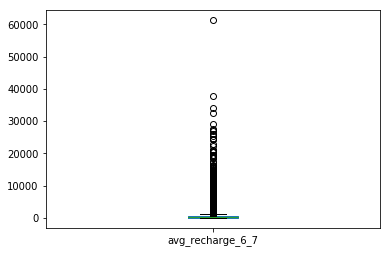

In [66]:
# Plotting Boxplot to check distribution of average recharge for 6th and 7th month
df.avg_recharge_6_7.plot(kind='box')
plt.show()

In [67]:
#  Filtering rows which have more than 70th percentile of avg_recharge_6_7
df = df[df.avg_recharge_6_7 >= df.avg_recharge_6_7.quantile(0.7)]
# Checking shape of dataframe
df.shape

(28837, 155)

### Categorical variables

In [68]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 155 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

### Convert to categorical variables

In [69]:
df.mobile_number = df.mobile_number.astype('object')
df.churn = df.churn.astype('uint8')

### One-Hot Encoding 

In [70]:
# Displayin categorical variables
cat_vars

['fb_user_8',
 'fb_user_6',
 'fb_user_7',
 'night_pck_user_8',
 'night_pck_user_6',
 'night_pck_user_7']

In [71]:
# One hot encoding for categorical variables
for cols in cat_vars:
    temp_cols = pd.get_dummies(df[cols], prefix=cols, drop_first=True)
    df = pd.concat([df, temp_cols], axis=1)
    df = df.drop(cols, axis=1)

In [72]:
# checking if dummy variables are created for categorical variables
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 161 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

### Univariate And Bivariate Analysis to Understand the Dataset Better

In [73]:
# feature type summary

df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28837 entries, 0 to 99997
Data columns (total 161 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

In [74]:
# looking at data statistics

df.describe(include = 'all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_recharge_6_7,fb_user_8_1,fb_user_8_2,fb_user_6_1,fb_user_6_2,fb_user_7_1,fb_user_7_2,night_pck_user_8_1,night_pck_user_8_2,night_pck_user_6_1,night_pck_user_6_2,night_pck_user_7_1,night_pck_user_7_2
count,2.883700e+04,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,28837.000000,

In [75]:
# Creating a function for barplot
def barplot(y_value):
    ax = sns.barplot(x='churn', y=y_value, data=df, estimator=np.mean )
    return ax

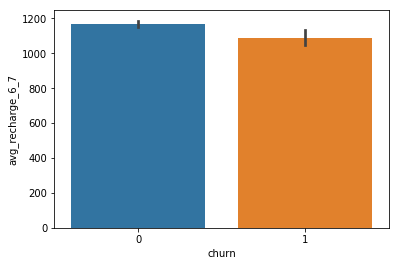

In [76]:
# barplot of average recharge of 6th and 7th month vs churn status
barplot('avg_recharge_6_7')

**Observations:**

Average recharge amount for 6th and 7th months seems to have no significant effect on churn 

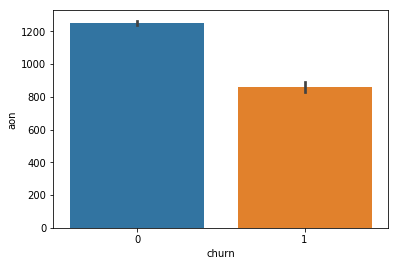

In [77]:
# barplot of Age on network - number of days the customer is using the operator T network vs Churn status
barplot('aon')

**Observations:**

Customers with lesser age on network seems to have churned more.

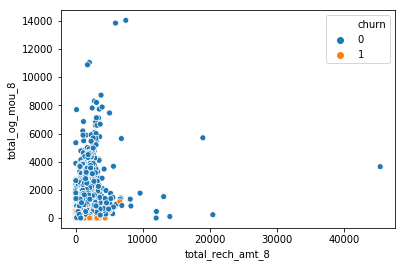

In [78]:
# checkin scatter plot of total recharge amount vs total outgoing with churn as hue
sns.scatterplot(data=df, x="total_rech_amt_8", y="total_og_mou_8", hue="churn")

**Observations:**
People with less outgoing calls in 8th month have churned.

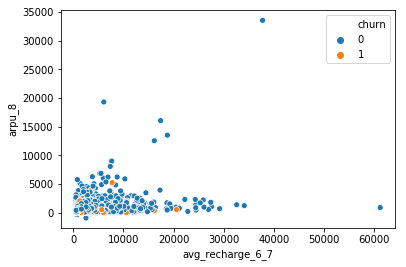

In [79]:
# checkin scatter plot of avg_recharge_6_7 vs arpu_8 with churn as hue
sns.scatterplot(data=df, x="avg_recharge_6_7", y="arpu_8", hue="churn")


**Observations:**
When Average revenue per user for 8th month is less, we see more people churned

## Step 3 : Data Preparation - Preparing Data for Modelling

### Outliers Treatment

In [80]:
# Copying dataframe
df_1 = df.copy()

In [81]:
# Checking shape of dataframe
df_1.shape

(28837, 161)

In [82]:
# Selecting continuous variables
df_numeric = df_1.select_dtypes(include=['float64', 'int64'])

In [83]:
# Quantile-based Flooring and Capping
df_numeric.describe().loc[['mean','50%', 'min', 'max']]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_6_7
mean,567.343044,568.713895,515.794061,266.890756,273.527462,240.080769,383.092176,387.305512,344.58456,16.453513,12.964345,12.803773,27.265029,20.605623,20.368642,86.681422,87.885704,80.323104,167.379468,167.106579,156.408475,6.493393,6.578112,6.040839,1.602024,1.920324,1.729419,260.626496,261.666868,243.096069,169.373635,177.409984,151.424276,183.716637,192.06388,160.287848,1.832864,1.867842,1.621237,354.96714,371.399695,313.529298,2.211596,2.131855,1.9567,5.93472,7.241161,6.671732,0.672358,0.044558,0.059509,624.017246,641.926287,563.310451,66.943577,68.271875,64.569256,154.093432,155.533884,151.182356,15.658657,16.452723,14.798578,236.806125,240.409741,231.064912,15.234884,15.767954,14.181394,29.910926,31.581433,28.606277,2.771345,2.882545,2.636628,47.941127,50.265048,45.532155,296.424859,303.547538,286.286745,0.062176,0.019926,0.026738,10.941081,12.054226,11.105182,1.18355,1.539364,1.254244,12.037695,11.878108,10.113673,671.370392,669.556369,592.691057,169.409578,171.748691,160.410688,100.623678,100.235357,92.379096,1.684537,1.869577,1.634047,76.491452,78.117245,71.128515,1.262129,1.417554,1.224989,0.422409,0.452023,0.409058,128.908105,137.96943,120.630679,128.255197,126.648643,106.828424,333.833093,360.508141,343.051035,64.977913,66.780172,61.14334,61.308584,62.706095,56.656271,0.176683,0.184693,0.155391,1.085446,1.232861,1.069598,0.211499,0.222804,0.20654,0.21091,0.229219,0.202518,1220.815203,169.936246,179.464508,159.553023,8.156223,1163.227672
50%,490.440000,489.234000,435.125000,88.340000,86.740000,68.960000,230.240000,227.490000,188.99000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.630000,25.810000,21.890000,80.740000,81.860000,71.160000,0.130000,0.210000,0.000000,0.000000,0.000000,0.000000,129.960000,133.310000,115.560000,3.340000,3.200000,0.930000,18.110000,17.59000,10.730000,0.000000,0.000000,0.000000,50.64000,49.130000

In [84]:
# Find the 90th and 10th quantile for numeric variables and clip the outliers
df_quantile_10 = df_numeric.quantile(0.10)
df_quantile_90 = df_numeric.quantile(0.90)

In [ ]:
# clipping outliers
for cols in df_numeric.columns:
    df_1[cols] = df_1[cols].apply(lambda x: df_quantile_90[cols] if x > df_quantile_90[cols] else (df_quantile_10[cols] if x < df_quantile_10[cols] else x) )

In [ ]:
# statistical analysis
df_1.describe().loc[['mean','50%', 'min', 'max']]

### Class Imbalance

In [ ]:
# checking value counts for class imbalance validation
df_1.churn.value_counts()

### Train, Test Data Split

Divide the data into Train and Test split (70:30)

In [ ]:
# splitting into train and test using stratified sampling to handle class imbalance
df_train, df_test = train_test_split(df_1, 
                                     train_size=0.7, 
                                     random_state=100,
                                     stratify=df_1.churn)

## Standard Scaling 

Perform standard scaling only for numeric types in the cleaned dataframe

In [ ]:
# Standardizing (Scaling) train data
scaler = StandardScaler()
df_train[df_numeric.columns] = scaler.fit_transform(df_train[df_numeric.columns])

In [ ]:
# Scaling test data
df_test[df_numeric.columns] = scaler.transform(df_test[df_numeric.columns])

Check values after scaling

In [ ]:
# validating if scaling has been applied
df_train[df_numeric.columns].describe().loc[['min', 'max', 'mean', '50%']]

## Step 4 : Data Modelling

## Step 5 : Prediction

## Step 6 : Evaluation of Model

## Step 7 : Identifying important predictor attributes 

In [ ]:
df_identify_imp_attr = df.copy()

In [ ]:
# Dividing data into X_train and y_train
y = df_identify_imp_attr.pop('churn')
X = df_identify_imp_attr 

In [ ]:
# Validating X and y divide
print(y.shape)
print(X.shape)

In [ ]:
# Fitting Logistic model
lm = LogisticRegression()
lm.fit(X, y)

In [ ]:
# Running RFE (Recursive Feature Elimination) with output number of variables 15
rfe = RFE(lm, 15)
rfe.fit(X, y)

In [ ]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Checking columns with RFE support true
col = X.columns[rfe.support_]
col

In [ ]:
# creating copy of dataframe with rfe selected predictors
df_important_predictors = df[col].copy()

In [ ]:
# Plotting heatmap to remove correlated features
plt.figure(figsize= (12,12))
sns.heatmap(df_important_predictors.corr(), annot=True)

In [ ]:
# Creating list of columns to be dropped from above heatmap
drop_columns_corr = ['total_rech_amt_7', 'total_rech_amt_8', 'offnet_mou_8', 'arpu_7', 
                     'std_og_mou_8', 'total_og_mou_7', 'vol_3g_mb_7']

In [ ]:
# dropping columns based on above correlation numbers
df_important_predictors = df_important_predictors.drop(drop_columns_corr, axis=1)

In [ ]:
# Plotting heatmap to remove correlated features
plt.figure(figsize= (12,12))
sns.heatmap(df_important_predictors.corr(), annot=True)

In [ ]:
# printing important predictors
df_important_predictors.columns

In [ ]:
# Creating list of important predictors and adding churn for pairplot
important_predictors = ['arpu_8', 'loc_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'vol_3g_mb_8', 'aon', 'avg_recharge_6_7', 'churn']

In [ ]:
# Creating pairplot for visualization
sns.pairplot(df[important_predictors])

## Conclusion